In [33]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [23]:
train_dataset = h5py.File("train_catvnoncat.h5", 'r')
test_dataset = h5py.File("test_catvnoncat.h5", 'r')

In [24]:
for k in train_dataset.keys():
    print(k)

list_classes
train_set_x
train_set_y


In [25]:
train_dataset['train_set_x'].shape

(209, 64, 64, 3)

In [26]:
train_dataset['train_set_y'].shape

(209,)

In [27]:
# 取出训练集与测试集
train_data_org = train_dataset["train_set_x"][:]
train_labels_org = train_dataset['train_set_y'][:]
test_data_org = test_dataset["test_set_x"][:]
test_labels_org = test_dataset['test_set_y'][:]

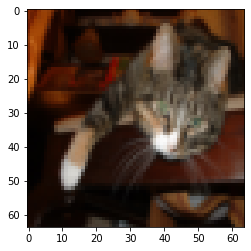

In [29]:
# 查看图片
%matplotlib inline
plt.imshow(train_data_org[148])

In [31]:
# 数据维度处理
# 获取样本个数
m_train = train_data_org.shape[0]
m_test = test_data_org.shape[0]

train_data_tran = train_data_org.reshape(m_train, -1).T #将（209，64，64，3）reshape成（209，64*64*3）的格式，再转置
test_data_tran = test_data_org.reshape(m_test, -1).T

In [32]:
print(test_data_tran.shape, test_data_tran.shape)

(12288, 50) (12288, 50)


In [39]:
# 数据维度处理
# 标签的处理
train_lable_tran = train_labels_org.reshape(1, m_train)
test_lable_tran = test_labels_org.reshape(1, m_test)
#print(train_lable_tran.shape, test_lable_tran.shape)

In [40]:
# 标准化数据
# 将0~255标准化到0~1
train_data_sta = train_data_tran / 255
test_data_sta = test_data_tran / 255
print(test_data_sta)

[[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


In [41]:
# 定义sigmoid函数
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [44]:
# 初始化w, b
n_dim = train_data_sta.shape[0]
w = np.zeros((n_dim, 1))
b = 0

In [47]:
# 定义前向传播函数，代价函数，梯度下降
def propagate(w, b, X, y):
    
    # 前向传播函数
    Z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    # 代价函数
    m = X.shape[1]
    J = -1/m * np.sum(y * np.log(A) + (1-y) * np.log(1-A))
    
    # 梯度下降
    dw = np.dot(X, (A-y).T) / m
    db = np.dot(A-y)
    
    return dw, db, J

In [48]:
# 优化部分
def optimize(w, b, X, y, alpha, n_iters):
    
    J_lis = []
    
    for i in range(n_iters):
        dw, db, J = propagate(w, b, X, y)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 100 == 0:
            J_lis.append(J)
            print("n_iters is ", i, ", cost is ", J)
            
    return dw,db,w,b,J_lis

In [49]:
# 预测部分
def predict(w, b, X_test):
    
    Z = np.dot(w.T, X_test) + b
    A = sigmoid(Z)
    
    m = X_test.shape[1]
    y_pred = np.zeros((1,m))
    
    for i in range(m):
        if A[:,i] > 0.5:
            y_pred[:, i] = 1
        else:
            y_pred[:, i] = 0
    return y_pred

In [ ]:
# 模型的整合
def model(w, b, x_train, y_train, x_test, y_test, alpha, n_iters):
    w, b, 